In [1]:
# Install library
!pip install plotly
!pip install wordcloud

# Imports Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
# Read the dataframe

df = pd.read_csv(r'C:\Users\WANCHI\Desktop\CV\materials\Course 8 case study\E-Commerce Riviews\Dataset E-Commerce Reviews.csv', 
                 index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.drop_duplicates()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
# Check nan Values

df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
# Drop null values

df.dropna(subset=['Title', 'Review Text'], inplace=True)
df.isnull().sum()

Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [7]:
df[['Rating']].describe()

,Rating
count,19675.000000
mean,4.183685
std,1.112055
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
# Plot the histogram of rating



fig1 = px.histogram(df, x="Rating")
fig1.update_traces(marker_color="chocolate",marker_line_color='rgb(48,23,8)',
                  marker_line_width=1)
fig1.update_layout(title_text='Product Rating')
fig1.show()

In [9]:
# Create smaller data frame with data columns in need

df.drop(labels=['Clothing ID', 'Age', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 
                'Department Name', 'Class Name' ], axis=1, inplace=True)
df.head()

,Title,Review Text,Rating
2,Some major design flaws,I had such high hopes for this dress and reall...,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Flattering shirt,This shirt is very flattering to all due to th...,5
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5


In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WANCHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


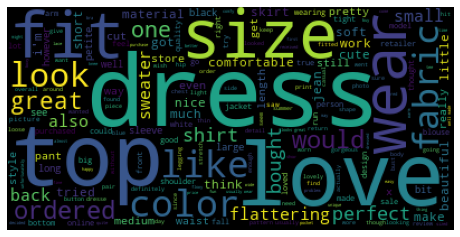

In [11]:
# Create stopwords list:

stopwords = set(stopwords.words('english'))
textt = " ".join(review for review in df['Review Text'])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

# plot the WordCloud image 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
# Assign reviews with rating > 3 as positive sentiment
# rating < 3 negative sentiment
# remove rating = 3
df = df[df['Rating'] != 3]
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 3 else -1)
df.head(10)

,Title,Review Text,Rating,sentiment
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,-1
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1
8,Flattering,I love this dress. i usually get an xs but it ...,5,1
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1
12,Perfect!!!,More and more i find myself reliant on the rev...,5,1
13,Runs big,Bought the black xs to go under the larkspur m...,5,1
15,"Nice, but not for my body",I took these out of the package and wanted the...,4,1


In [13]:
# Split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [14]:
## beautiful, cute and great removed because they were included in negative sentiment

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(['beautiful','cute','great']) 

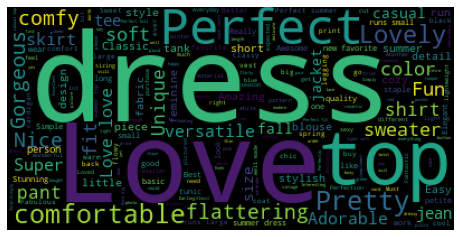

In [15]:
# Wordcloud — positive sentiment

pos = " ".join(review for review in positive.Title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

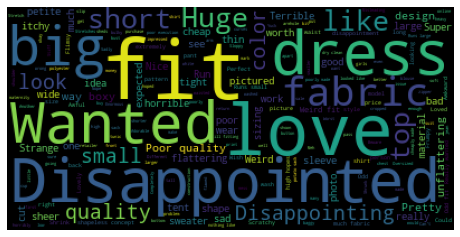

In [16]:
# Wordcloud — negative sentiment

neg = " ".join(review for review in negative.Title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [17]:
# Order the data with sentiment

df.sort_values(by=['sentiment'], inplace=False, ascending=True ).head(30)

,Title,Review Text,Rating,sentiment
12504,Color not as pictured on website,I wish i had read the other review about the c...,2,-1
20254,Not for the full figured,This would be a great blouse for flat chested ...,1,-1
9631,Really odd fit!,This looked so odd on me! i decided to give it...,2,-1
3792,Dress is extremely pear-shaped.,"I bought this dress in an xs, and am 5'4"", 115...",2,-1
15037,Runs big,This dress looks so cute in the pictures-i lov...,2,-1
9628,Beautiful but falls apart,"This top is absolutely gorgeous, but i followe...",2,-1
3799,See through,I would really like this dress if the material...,1,-1
15042,Dress is made for broad shoulders and small waist,The fabric and colors of this dress are beauti...,2,-1
3806,Poor quality,Recently received this and was very disappoint...,1,-1
3778,Not great,Looks much nicer in the photo. i expected a mu...,2,-1


In [18]:
# Count the number of negative reviews

df[df['sentiment'] == -1].count()

Title          2051
Review Text    2051
Rating         2051
sentiment      2051
dtype: int64

In [19]:
# Filter 'Title' contains 'wanted' or 'love'

df1 = df[df['Title'].str.contains('wanted|love')]
df1[df1['sentiment'] == -1].head(30)

,Title,Review Text,Rating,sentiment
68,I wanted to love this top...,I really loved this top online and wanted to l...,2,-1
603,"Wanted to love, but sadly will return.","These run very small!! they are also short, al...",1,-1
806,Wanted to love it - but . . .,"I wanted to love this. however, the fit was fu...",2,-1
880,So wanted to love it...,"Ditto what the first reviewer said, unfortunat...",2,-1
1061,Farm animal pullover,Wanted to love this sweater for its beautiful ...,2,-1
1063,"I wanted to love this sweater, but......",This is a beautiful sweater with deep rich col...,2,-1
1257,Wanted to love...,"I wanted to love this top, but it unfortunatel...",2,-1
1300,Wanted to love,"I bought two, one in white and one in blue pri...",2,-1
1316,I wanted to love it...,I really like the look of the top when it is p...,2,-1
1331,Wanted to love it,"An absolutely gorgeous, but poorly fitting blo...",2,-1


In [20]:
# Count the number of 'Title' which contains 'wanted' or 'love'

df1[df1['sentiment'] == -1].count()

Title          72
Review Text    72
Rating         72
sentiment      72
dtype: int64

In [21]:
# Calculate the proportion of 'Title' which contains 'wanted' or 'love'

df1[df1['sentiment'] == -1].count() / df[df['sentiment'] == -1].count() *100

Title          3.510483
Review Text    3.510483
Rating         3.510483
sentiment      3.510483
dtype: float64

In [22]:
# Filter 'Title' contains 'fit,' 'big,' or 'huge'
df2 = df[df['Title'].str.contains( 'fit|big|huge')]
df2[df2['sentiment'] == -1]

,Title,Review Text,Rating,sentiment
118,Awkward fitting,"First, the fabric is beautiful and lovely for ...",2,-1
334,Not a good fit,This top was way too short (i'm only 5'1) and ...,1,-1
499,"Cute concept, fits weird",The fun colors drew me to this but it sure fit...,2,-1
518,Weird color and fit,Color is not like photo and fit doesn't work i...,2,-1
669,Weird fit,I tried this on in the store and was disappoin...,2,-1
...,...,...,...,...
22657,Strange fit,"The pattern and fabric are lovely, but the sle...",2,-1
22803,"Drab color, weird fit","Couldn't make it work, even belted. ivory colo...",2,-1
22844,Sweater is huge!!,Had to return. ordered an xs which usually fit...,2,-1
23016,Large fit,I was really excited to get this dress and to ...,2,-1


In [23]:
# Calculate the proportion of 'Title' which contains 'fit,' 'big,' or 'huge'

df2[df2['sentiment'] == -1].count() / df[df['sentiment'] == -1].count() *100

Title          8.922477
Review Text    8.922477
Rating         8.922477
sentiment      8.922477
dtype: float64

In [24]:
# Distribution of reviews with sentiment

df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig2 = px.histogram(df, x="sentimentt")
fig2.update_traces(marker_color="lightcoral",marker_line_color='rgb(48,23,8)',
                  marker_line_width=1)
fig2.update_layout(title_text='Product Sentiment')
fig2.show()

In [25]:
# Data Cleaning

def remove_punctuation(text):
    final = "".join(u for u in text if u not in (",", "?", ".", ";", ":", "!",'"',"'"))
    return final
df['Title'] = df['Title'].apply(remove_punctuation)


In [26]:
dfNew = df[['Title','sentiment']]
dfNew.head()

,Title,sentiment
3,My favorite buy,1
4,Flattering shirt,1
5,Not for the very petite,-1
6,Cagrcoal shimmer fun,1
7,Shimmer surprisingly goes with lots,1


In [27]:
# Split data into training and testing data

index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [28]:
# Count vectorizer:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Title'])
test_matrix = vectorizer.transform(test['Title'])

In [29]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [30]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [31]:
# Fit model on data

lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
predictions = lr.predict(X_test)

In [33]:
# Find accuracy, precision, recall

from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 222,   47],
       [ 228, 3182]], dtype=int64)

In [34]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.49      0.83      0.62       269
           1       0.99      0.93      0.96      3410

    accuracy                           0.93      3679
   macro avg       0.74      0.88      0.79      3679
weighted avg       0.95      0.93      0.93      3679

